In [1]:
import torch
import torchvision
import torch.nn.functional as F
from torch import nn, optim
from torchvision import transforms, datasets

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
from torch.optim import lr_scheduler

In [2]:
from scipy import io
mat_file = io.loadmat('data/PRW-v16.04.20/PRW-v16.04.20/ID_train.mat')

In [3]:
import os
from glob import glob


def make_file_list():
    train_img_list = []
    for image_path in glob('data/PRW-v16.04.20/PRW-v16.04.20/query_box/*.jpg') :
        
        train_img_list.append(image_path)
    
    return train_img_list

In [4]:
#이미지 불러오고 라벨링하는 클래스
from torch.utils.data import Dataset
from PIL import Image


class Custom_Img_Dataset(Dataset):

    def __init__(self, file_list, transform = None):
        self.file_list = file_list
        self.transform = transform
        
    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, index):
        
        img_path = self.file_list[index] # 데이터셋에서 파일 하나를 특정
        img = Image.open(img_path)
        
        user_id = img_path.split('query_box\\')[1].split('_')[0]
        
        if self.transform == None :
            tensor_image = img
        else :
            tensor_image = self.transform(img)
            
        return tensor_image, user_id
    

In [5]:
dataset = Custom_Img_Dataset(make_file_list())

In [6]:
len(dataset)

2057

In [7]:
import numpy as np

torch.manual_seed(0)

#테스트, 트레이닝 데이터 나누기
train_size = int(0.99 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

In [8]:
for i in test_dataset:
    print(i[1])

679
681
892
780
929
595
691
822
763
623
563
762
836
853
904
812
512
710
707
489
843


In [9]:
trainTransform_training  = transforms.Compose([ transforms.Resize((32, 32)), 
                                               #transforms.Grayscale(num_output_channels=1),
                                    transforms.ToTensor()
                                    #, transforms.Normalize((0.5,), (0.5,))
                                            
                                              ])



train_dataset.dataset.transform = trainTransform_training

In [10]:
trainloader = torch.utils.data.DataLoader(train_dataset , batch_size=10, shuffle=True, 
                               num_workers=0, drop_last=True)

In [11]:
testloader = torch.utils.data.DataLoader(test_dataset , batch_size=20, shuffle=False, 
                               num_workers=0, drop_last=True)
#train_dataset.dataset.transform = trainTransform_training

In [12]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, 3, padding=1),
            nn.LeakyReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(16, 4, 3, padding=1),
            nn.LeakyReLU(),
            nn.MaxPool2d(2, 2),
            Reshape((-1,4*8*8)),
            nn.Linear(4*8*8, 2*8*8),

        )
        self.decoder = nn.Sequential(
            nn.Linear(2*8*8, 4*8*8),
            nn.LeakyReLU(),
            Reshape((-1,4,8,8)),
            nn.ConvTranspose2d(4, 16, 2, stride=2),
            nn.LeakyReLU(),
            nn.ConvTranspose2d(16, 3, 2, stride=2),
            nn.Sigmoid()
            
        )
    def forward(self, x):
        out = self.encoder(x)
        out = self.decoder(out)
        return out
    
    def num_flat_features(self, x):
        size = x.size()[1:]  
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
    
class Reshape(nn.Module):
    def __init__(self, shape):
        super(Reshape, self).__init__()
        self.shape = shape
    def forward(self, x):
        return x.view(*self.shape)

In [13]:
def imshow(img):
    img = img / 2 + 0.5  
    plt.imshow(np.transpose(img, (1, 2, 0))) 

In [14]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [15]:
model = AutoEncoder().to(device)
#Loss function
criterion = nn.BCELoss()

#Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

Epoch: 1 	Training Loss: 6.472158


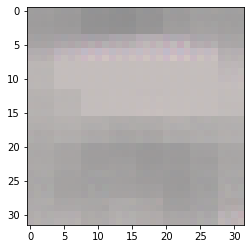

Epoch: 2 	Training Loss: 6.289083


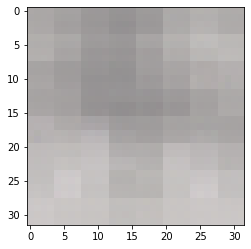

Epoch: 3 	Training Loss: 6.215391


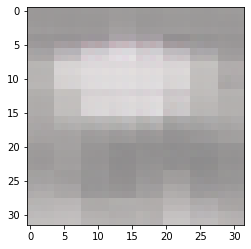

Epoch: 4 	Training Loss: 6.176734


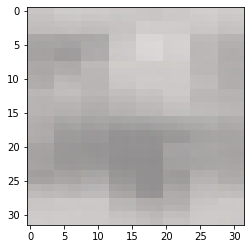

Epoch: 5 	Training Loss: 6.153587


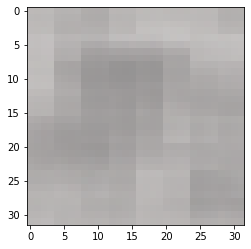

Epoch: 6 	Training Loss: 6.140229


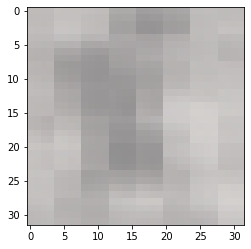

Epoch: 7 	Training Loss: 6.126821


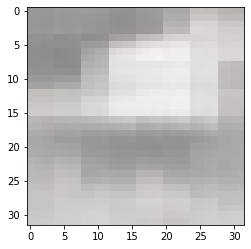

Epoch: 8 	Training Loss: 6.116017


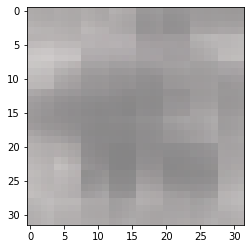

Epoch: 9 	Training Loss: 6.107757


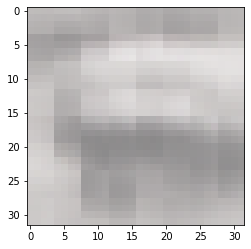

Epoch: 10 	Training Loss: 6.097814


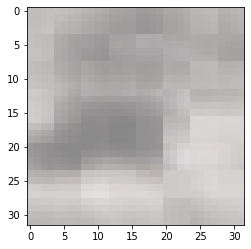

Epoch: 11 	Training Loss: 6.089928


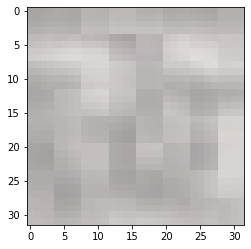

Epoch: 12 	Training Loss: 6.081218


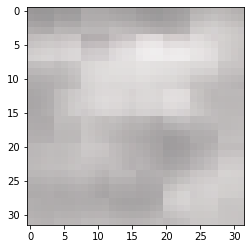

Epoch: 13 	Training Loss: 6.075561


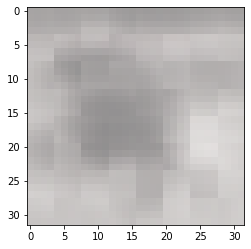

Epoch: 14 	Training Loss: 6.071513


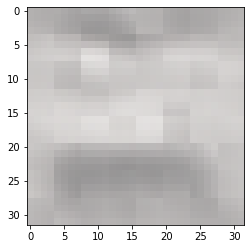

Epoch: 15 	Training Loss: 6.068007


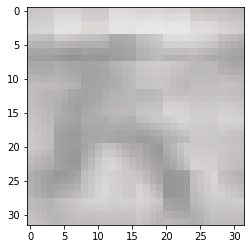

Epoch: 16 	Training Loss: 6.065803


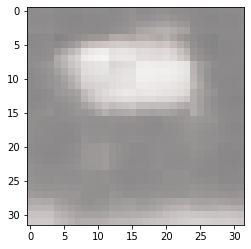

Epoch: 17 	Training Loss: 6.062985


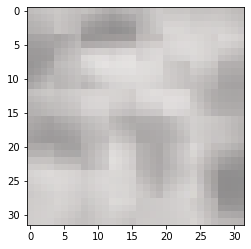

Epoch: 18 	Training Loss: 6.061320


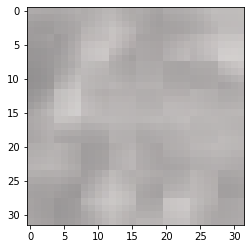

Epoch: 19 	Training Loss: 6.059264


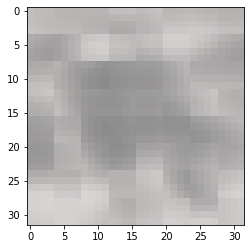

Epoch: 20 	Training Loss: 6.057176


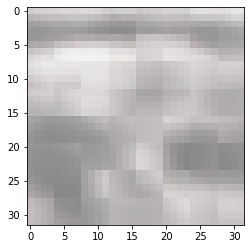

Epoch: 21 	Training Loss: 6.054324


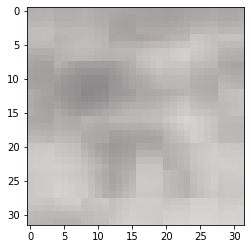

Epoch: 22 	Training Loss: 6.053710


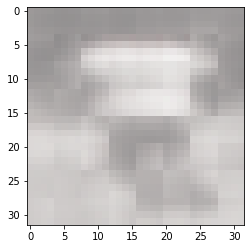

Epoch: 23 	Training Loss: 6.051763


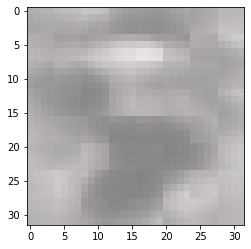

Epoch: 24 	Training Loss: 6.050191


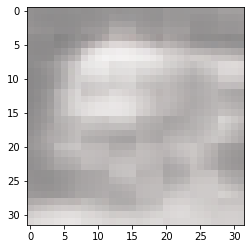

Epoch: 25 	Training Loss: 6.050029


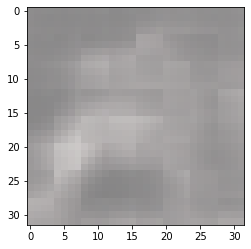

Epoch: 26 	Training Loss: 6.048651


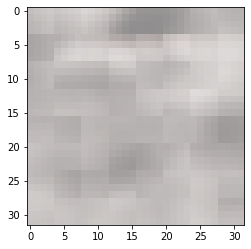

Epoch: 27 	Training Loss: 6.049248


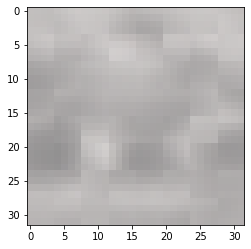

Epoch: 28 	Training Loss: 6.047432


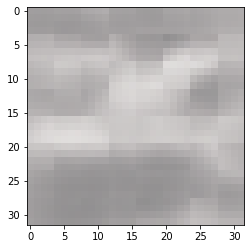

Epoch: 29 	Training Loss: 6.045263


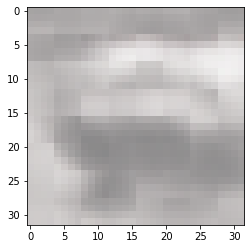

Epoch: 30 	Training Loss: 6.045384


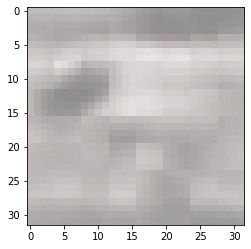

Epoch: 31 	Training Loss: 6.042900


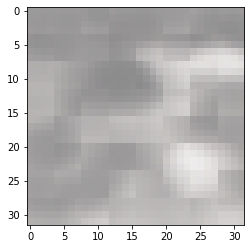

Epoch: 32 	Training Loss: 6.043104


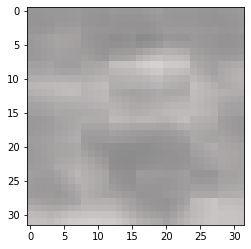

Epoch: 33 	Training Loss: 6.041399


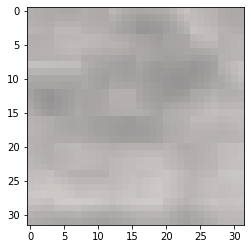

Epoch: 34 	Training Loss: 6.042389


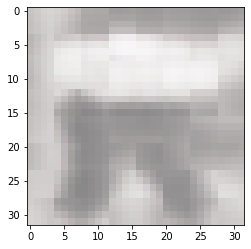

Epoch: 35 	Training Loss: 6.041119


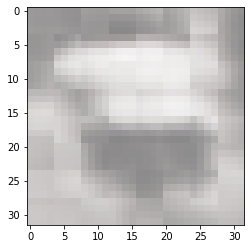

Epoch: 36 	Training Loss: 6.040897


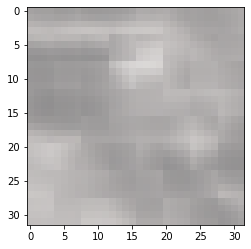

Epoch: 37 	Training Loss: 6.038582


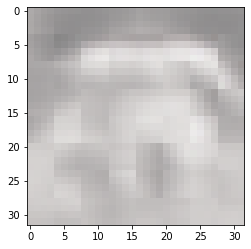

Epoch: 38 	Training Loss: 6.038501


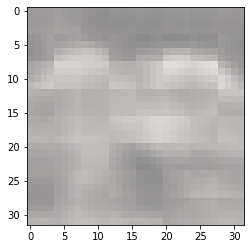

Epoch: 39 	Training Loss: 6.039052


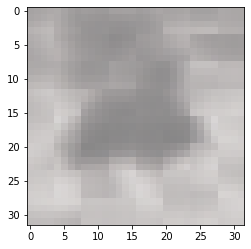

Epoch: 40 	Training Loss: 6.037542


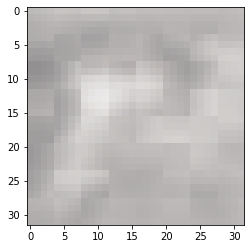

Epoch: 41 	Training Loss: 6.036283


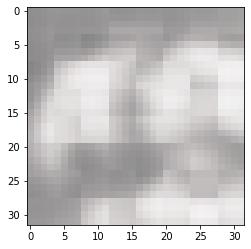

Epoch: 42 	Training Loss: 6.035812


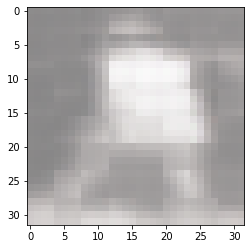

Epoch: 43 	Training Loss: 6.036274


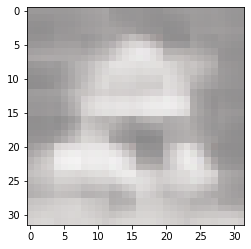

Epoch: 44 	Training Loss: 6.035227


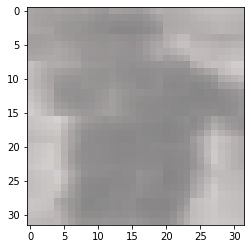

Epoch: 45 	Training Loss: 6.034389


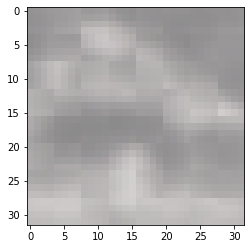

Epoch: 46 	Training Loss: 6.033305


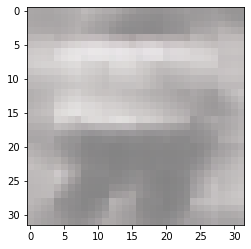

Epoch: 47 	Training Loss: 6.034846


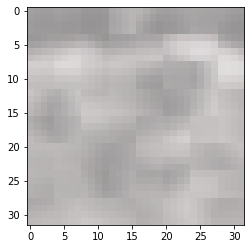

Epoch: 48 	Training Loss: 6.034171


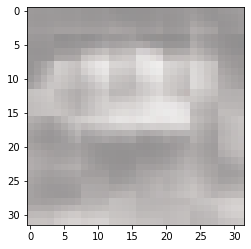

Epoch: 49 	Training Loss: 6.033534


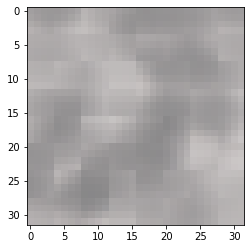

Epoch: 50 	Training Loss: 6.032533


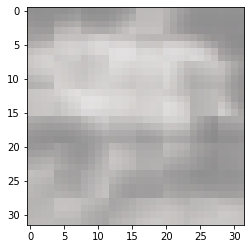

Epoch: 51 	Training Loss: 6.033581


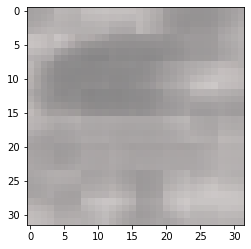

Epoch: 52 	Training Loss: 6.031895


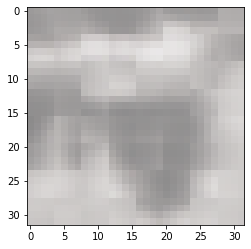

Epoch: 53 	Training Loss: 6.031999


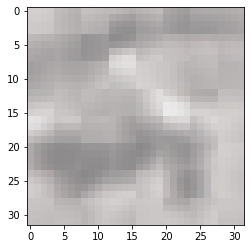

Epoch: 54 	Training Loss: 6.030600


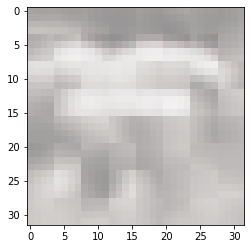

Epoch: 55 	Training Loss: 6.029665


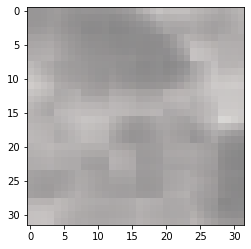

Epoch: 56 	Training Loss: 6.032243


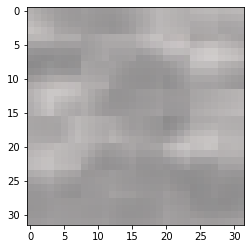

Epoch: 57 	Training Loss: 6.029994


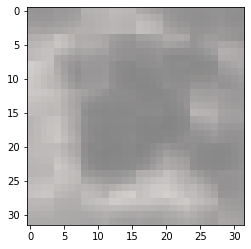

Epoch: 58 	Training Loss: 6.028910


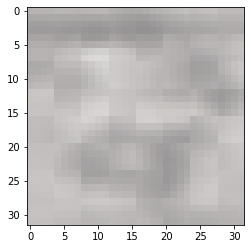

Epoch: 59 	Training Loss: 6.028754


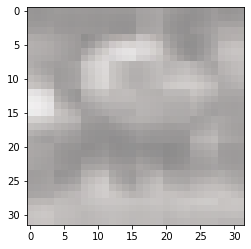

Epoch: 60 	Training Loss: 6.029084


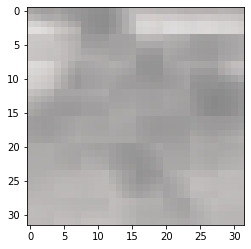

Epoch: 61 	Training Loss: 6.029520


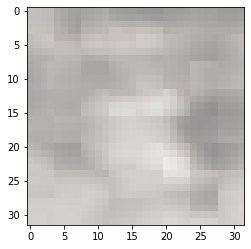

Epoch: 62 	Training Loss: 6.027660


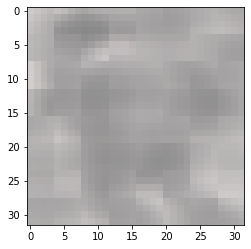

Epoch: 63 	Training Loss: 6.028351


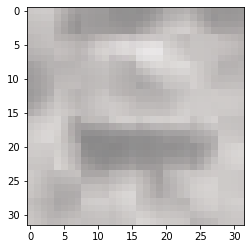

Epoch: 64 	Training Loss: 6.027927


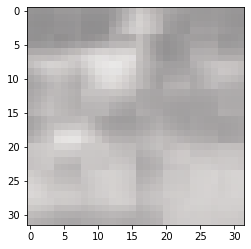

Epoch: 65 	Training Loss: 6.027890


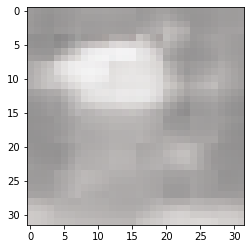

Epoch: 66 	Training Loss: 6.028087


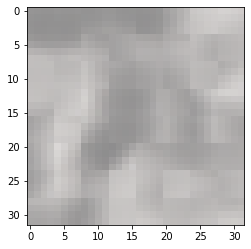

Epoch: 67 	Training Loss: 6.027039


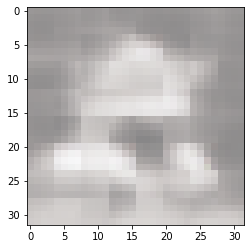

Epoch: 68 	Training Loss: 6.026707


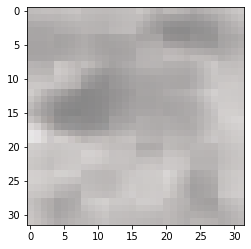

Epoch: 69 	Training Loss: 6.026542


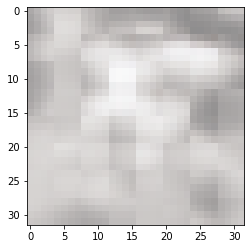

Epoch: 70 	Training Loss: 6.025795


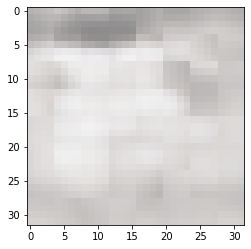

Epoch: 71 	Training Loss: 6.025319


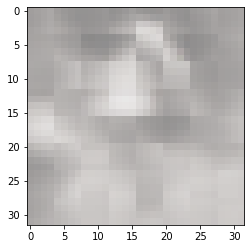

Epoch: 72 	Training Loss: 6.025432


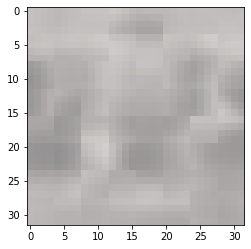

Epoch: 73 	Training Loss: 6.024835


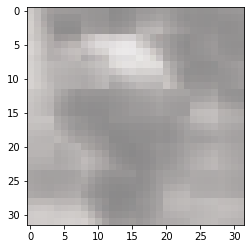

Epoch: 74 	Training Loss: 6.025163


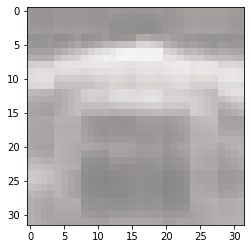

Epoch: 75 	Training Loss: 6.026414


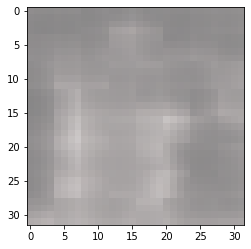

Epoch: 76 	Training Loss: 6.024987


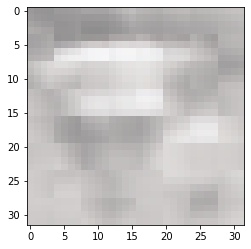

Epoch: 77 	Training Loss: 6.023698


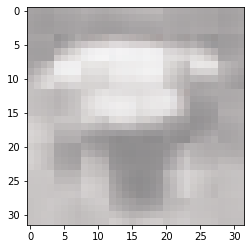

Epoch: 78 	Training Loss: 6.024447


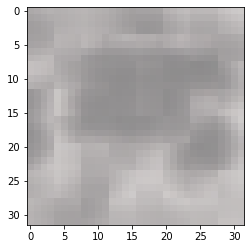

Epoch: 79 	Training Loss: 6.024595


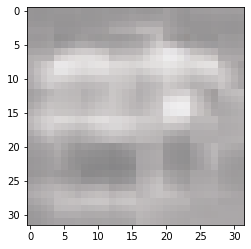

Epoch: 80 	Training Loss: 6.023679


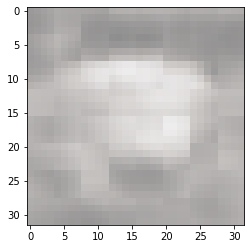

Epoch: 81 	Training Loss: 6.022302


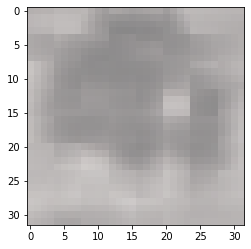

Epoch: 82 	Training Loss: 6.023488


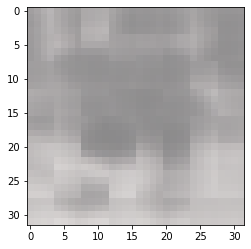

Epoch: 83 	Training Loss: 6.023256


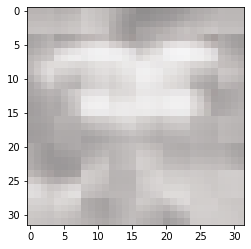

Epoch: 84 	Training Loss: 6.022600


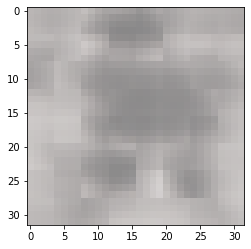

Epoch: 85 	Training Loss: 6.021972


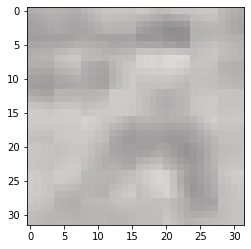

Epoch: 86 	Training Loss: 6.022258


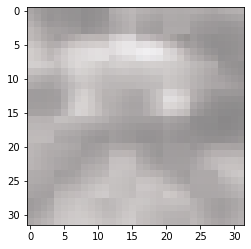

Epoch: 87 	Training Loss: 6.022529


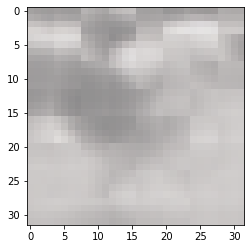

Epoch: 88 	Training Loss: 6.022497


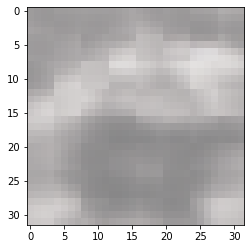

Epoch: 89 	Training Loss: 6.021535


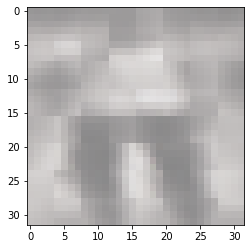

Epoch: 90 	Training Loss: 6.021724


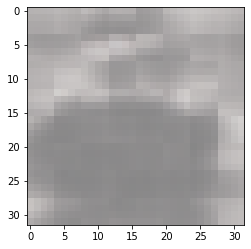

Epoch: 91 	Training Loss: 6.021454


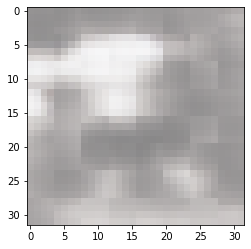

Epoch: 92 	Training Loss: 6.021331


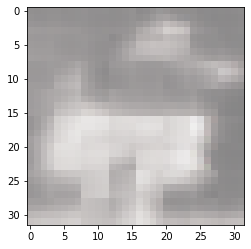

Epoch: 93 	Training Loss: 6.021948


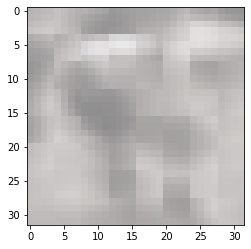

Epoch: 94 	Training Loss: 6.020370


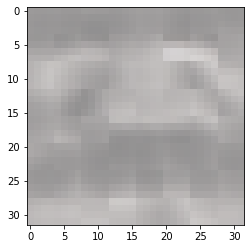

Epoch: 95 	Training Loss: 6.020865


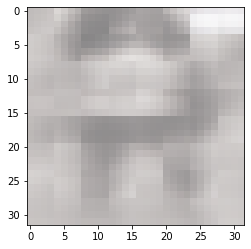

Epoch: 96 	Training Loss: 6.022115


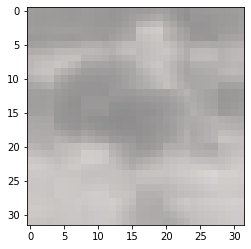

Epoch: 97 	Training Loss: 6.020785


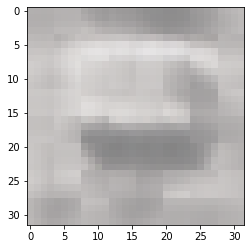

Epoch: 98 	Training Loss: 6.020407


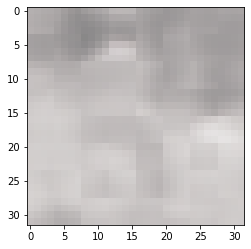

Epoch: 99 	Training Loss: 6.020362


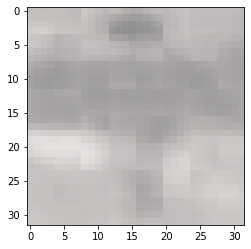

Epoch: 100 	Training Loss: 6.020240


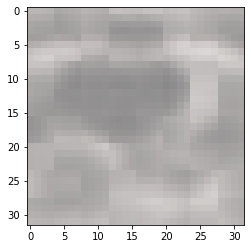

Epoch: 101 	Training Loss: 6.018726


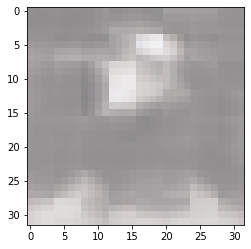

Epoch: 102 	Training Loss: 6.019773


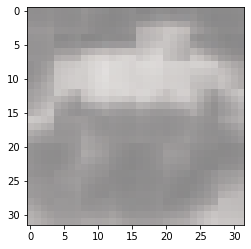

Epoch: 103 	Training Loss: 6.019028


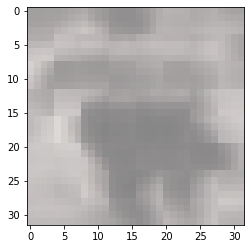

Epoch: 104 	Training Loss: 6.019345


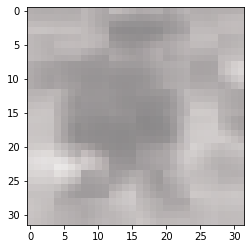

Epoch: 105 	Training Loss: 6.019180


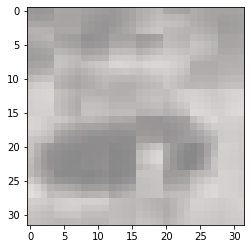

Epoch: 106 	Training Loss: 6.018910


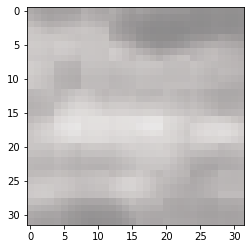

Epoch: 107 	Training Loss: 6.018058


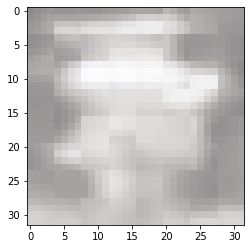

Epoch: 108 	Training Loss: 6.018766


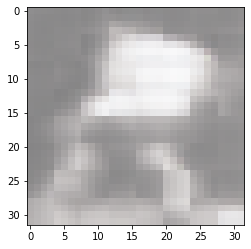

Epoch: 109 	Training Loss: 6.019126


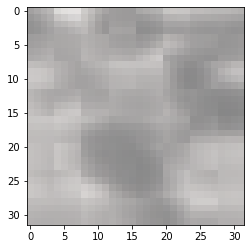

Epoch: 110 	Training Loss: 6.019043


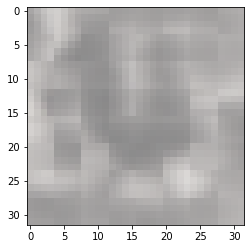

Epoch: 111 	Training Loss: 6.018636


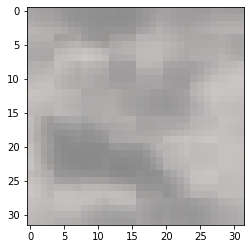

Epoch: 112 	Training Loss: 6.018132


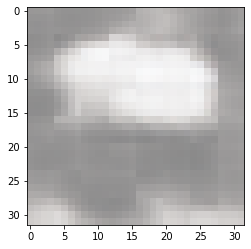

Epoch: 113 	Training Loss: 6.017799


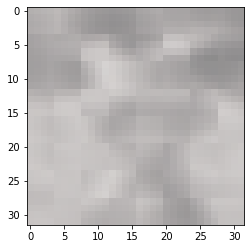

Epoch: 114 	Training Loss: 6.017637


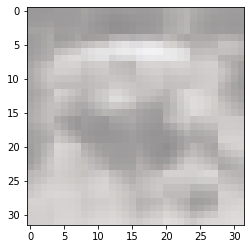

Epoch: 115 	Training Loss: 6.017977


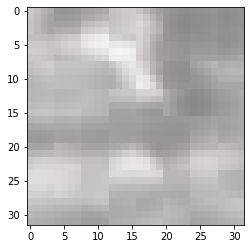

Epoch: 116 	Training Loss: 6.017895


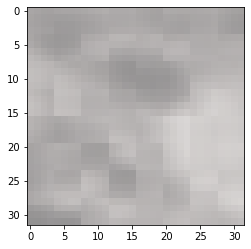

Epoch: 117 	Training Loss: 6.017672


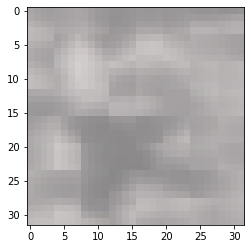

Epoch: 118 	Training Loss: 6.016881


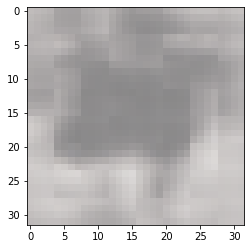

Epoch: 119 	Training Loss: 6.018176


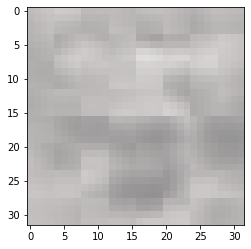

Epoch: 120 	Training Loss: 6.017071


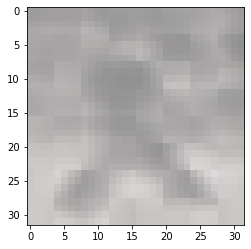

Epoch: 121 	Training Loss: 6.017665


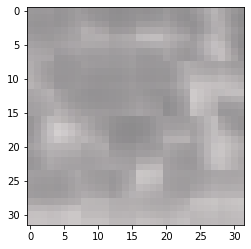

Epoch: 122 	Training Loss: 6.017798


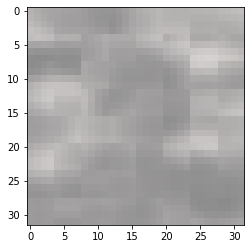

Epoch: 123 	Training Loss: 6.016166


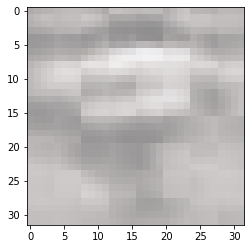

Epoch: 124 	Training Loss: 6.015769


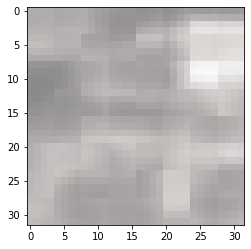

Epoch: 125 	Training Loss: 6.015980


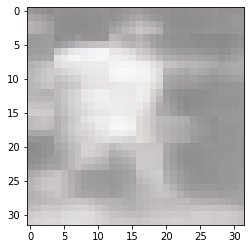

Epoch: 126 	Training Loss: 6.015166


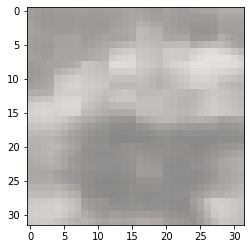

Epoch: 127 	Training Loss: 6.016287


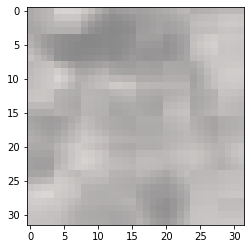

Epoch: 128 	Training Loss: 6.016029


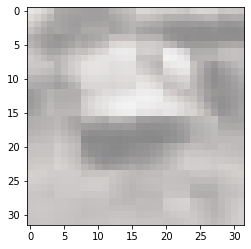

Epoch: 129 	Training Loss: 6.015715


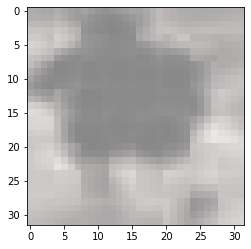

Epoch: 130 	Training Loss: 6.016164


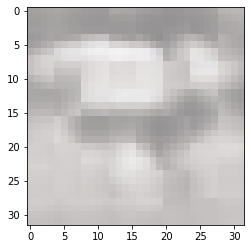

Epoch: 131 	Training Loss: 6.016788


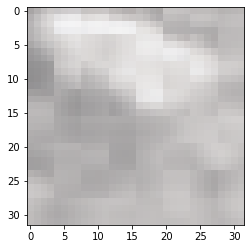

Epoch: 132 	Training Loss: 6.015678


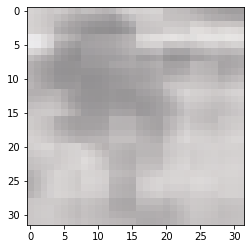

Epoch: 133 	Training Loss: 6.015513


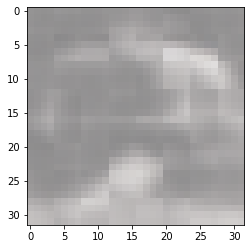

Epoch: 134 	Training Loss: 6.013985


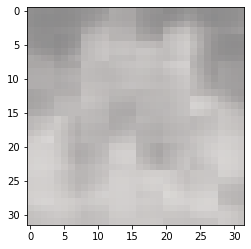

Epoch: 135 	Training Loss: 6.014959


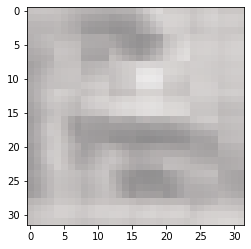

Epoch: 136 	Training Loss: 6.015094


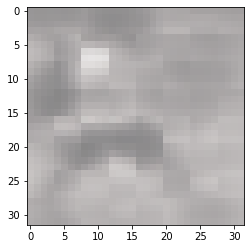

Epoch: 137 	Training Loss: 6.015124


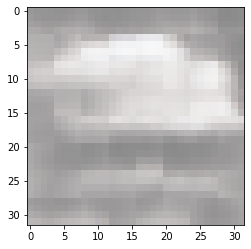

Epoch: 138 	Training Loss: 6.015517


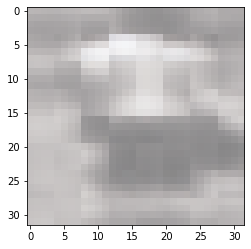

Epoch: 139 	Training Loss: 6.015063


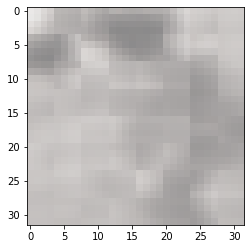

Epoch: 140 	Training Loss: 6.015516


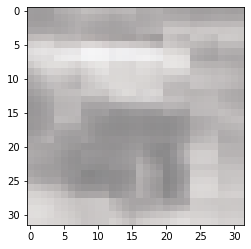

Epoch: 141 	Training Loss: 6.015039


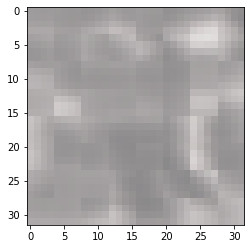

Epoch: 142 	Training Loss: 6.014641


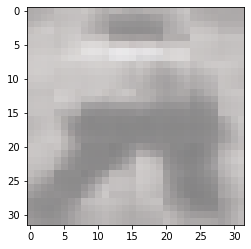

Epoch: 143 	Training Loss: 6.013220


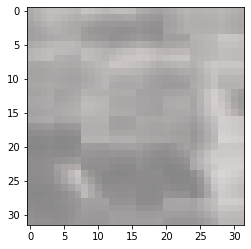

Epoch: 144 	Training Loss: 6.014119


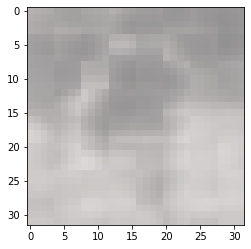

Epoch: 145 	Training Loss: 6.014558


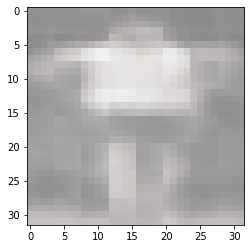

Epoch: 146 	Training Loss: 6.014431


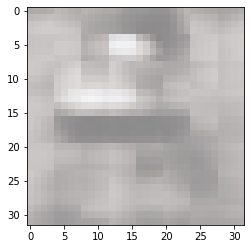

Epoch: 147 	Training Loss: 6.014425


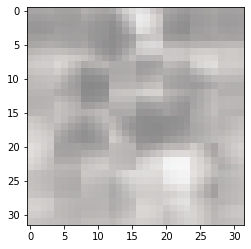

Epoch: 148 	Training Loss: 6.013868


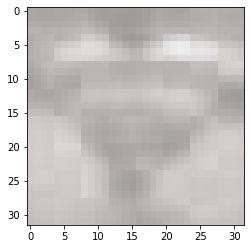

Epoch: 149 	Training Loss: 6.013169


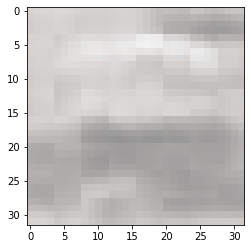

Epoch: 150 	Training Loss: 6.015120


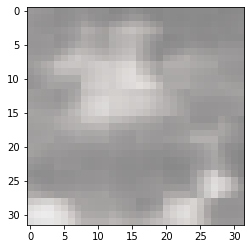

Epoch: 151 	Training Loss: 6.013434


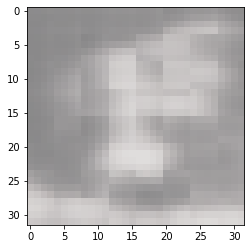

Epoch: 152 	Training Loss: 6.013313


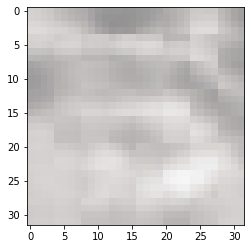

Epoch: 153 	Training Loss: 6.012598


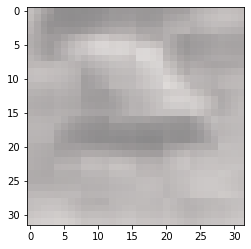

Epoch: 154 	Training Loss: 6.013143


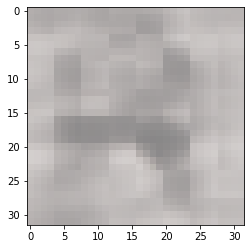

Epoch: 155 	Training Loss: 6.013313


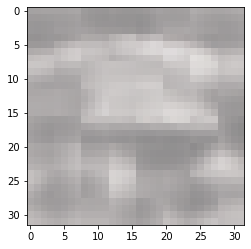

Epoch: 156 	Training Loss: 6.012399


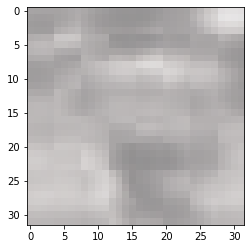

Epoch: 157 	Training Loss: 6.013193


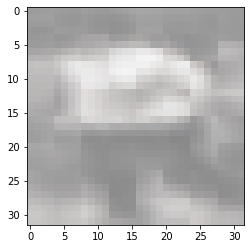

Epoch: 158 	Training Loss: 6.012098


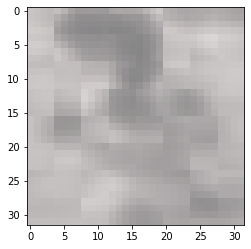

Epoch: 159 	Training Loss: 6.012743


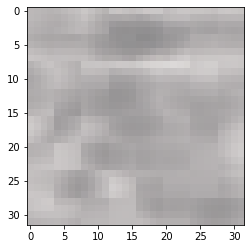

Epoch: 160 	Training Loss: 6.012801


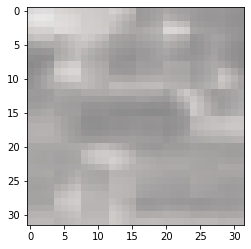

Epoch: 161 	Training Loss: 6.012166


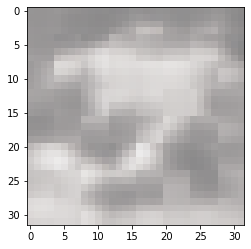

Epoch: 162 	Training Loss: 6.012807


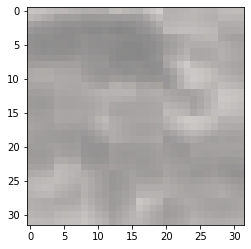

Epoch: 163 	Training Loss: 6.012413


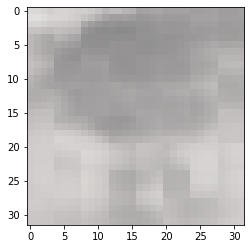

Epoch: 164 	Training Loss: 6.012184


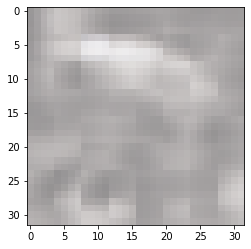

Epoch: 165 	Training Loss: 6.011477


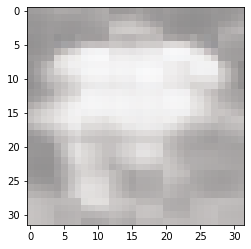

Epoch: 166 	Training Loss: 6.012156


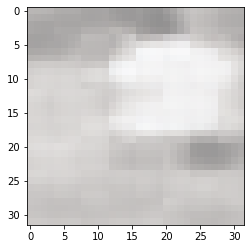

Epoch: 167 	Training Loss: 6.012315


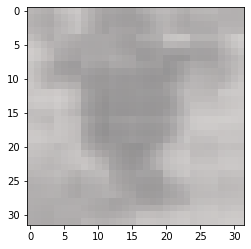

Epoch: 168 	Training Loss: 6.011784


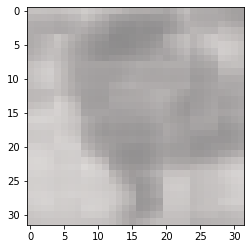

Epoch: 169 	Training Loss: 6.012181


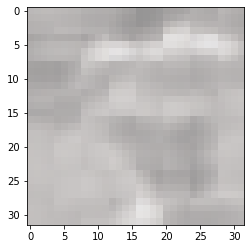

Epoch: 170 	Training Loss: 6.010945


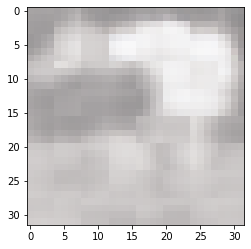

Epoch: 171 	Training Loss: 6.012414


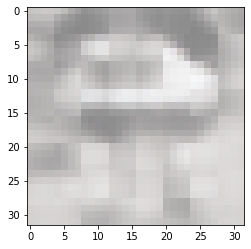

Epoch: 172 	Training Loss: 6.010968


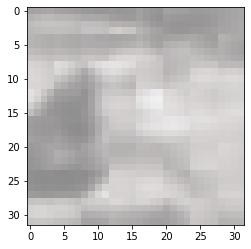

Epoch: 173 	Training Loss: 6.012479


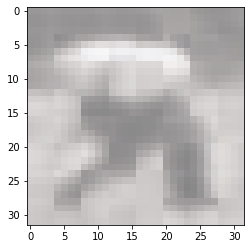

Epoch: 174 	Training Loss: 6.011095


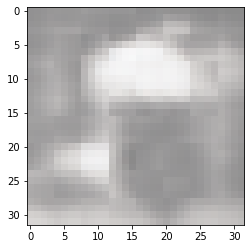

Epoch: 175 	Training Loss: 6.012065


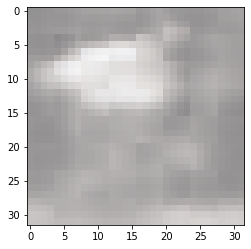

Epoch: 176 	Training Loss: 6.011510


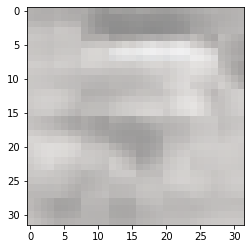

Epoch: 177 	Training Loss: 6.011374


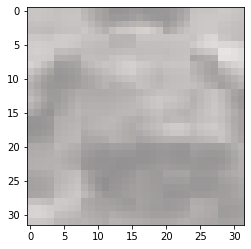

Epoch: 178 	Training Loss: 6.010898


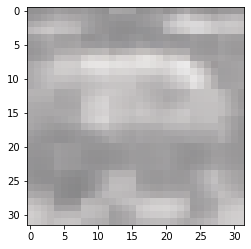

Epoch: 179 	Training Loss: 6.012429


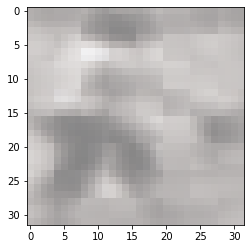

Epoch: 180 	Training Loss: 6.009824


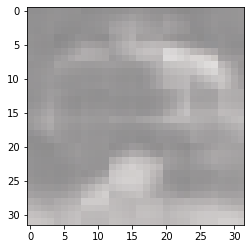

Epoch: 181 	Training Loss: 6.011424


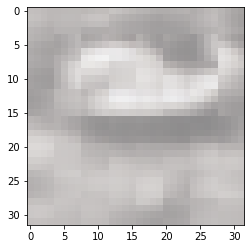

Epoch: 182 	Training Loss: 6.010676


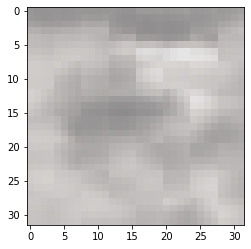

Epoch: 183 	Training Loss: 6.010818


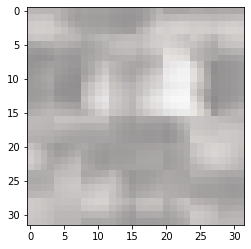

Epoch: 184 	Training Loss: 6.011646


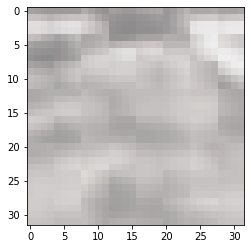

Epoch: 185 	Training Loss: 6.009999


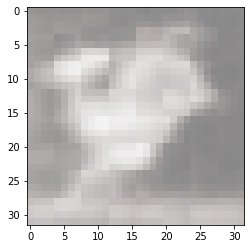

Epoch: 186 	Training Loss: 6.010264


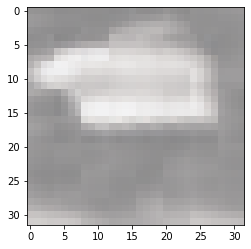

Epoch: 187 	Training Loss: 6.010029


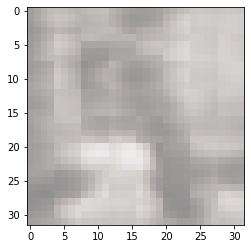

Epoch: 188 	Training Loss: 6.009388


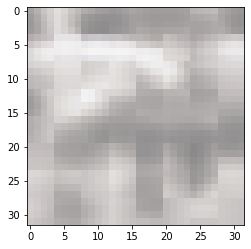

Epoch: 189 	Training Loss: 6.010933


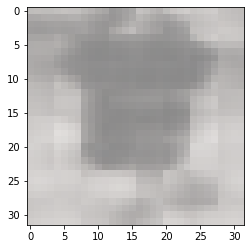

Epoch: 190 	Training Loss: 6.010213


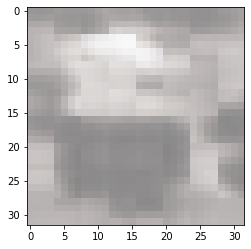

Epoch: 191 	Training Loss: 6.009972


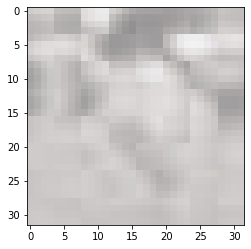

Epoch: 192 	Training Loss: 6.009398


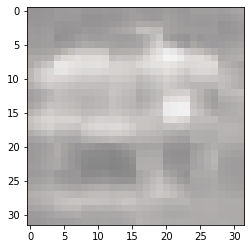

Epoch: 193 	Training Loss: 6.010392


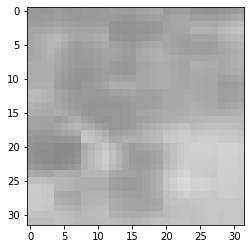

Epoch: 194 	Training Loss: 6.009837


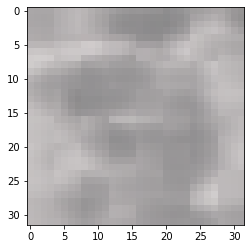

Epoch: 195 	Training Loss: 6.008948


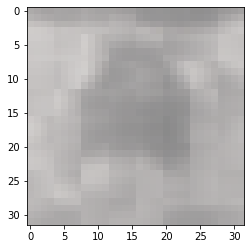

Epoch: 196 	Training Loss: 6.010059


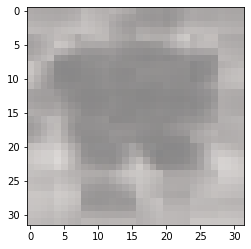

Epoch: 197 	Training Loss: 6.009577


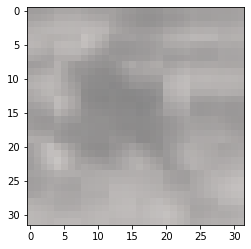

Epoch: 198 	Training Loss: 6.008311


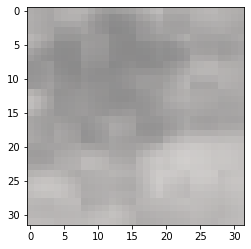

Epoch: 199 	Training Loss: 6.008702


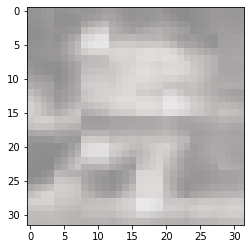

Epoch: 200 	Training Loss: 6.008564


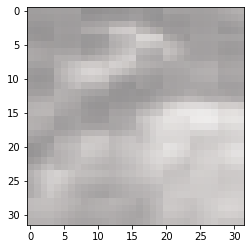

In [17]:
#Epochs
n_epochs = 200
loss_list = []
for epoch in range(1, n_epochs+1):
    # monitor training loss
    train_loss = 0.0

    #Training
    for data in trainloader:
        images, user_id = data
        images = images.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, images)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*images.size(0)
          
    train_loss = train_loss/len(trainloader)
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch, train_loss))
    loss_list.append(train_loss)
    imshow(outputs[0].detach().cpu())
    plt.show() 
    model.train()

In [21]:
torch.save(model.state_dict(), 'AutoEncoder')

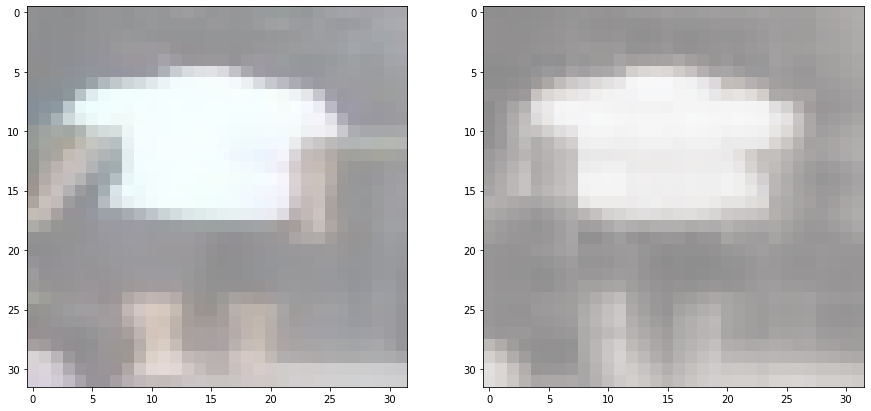

In [20]:
plt.figure(figsize=(15,10))
model.eval()
for image, _ in testloader :
    ax1 = plt.subplot(1, 2, 1)
    imshow(image.data[7])
    ax2 = plt.subplot(1, 2, 2)
    img = model(image.to(device))
    imshow(img[7].detach().cpu().numpy())

plt.show()

In [ ]:
for image, _ in testloader : 
    img = model.encoder(image.to(device))
    latent_vector = img[3].detach().cpu().numpy()
    print(latent_vector)
    break